In [115]:
%pylab inline
import pandas as pd
import math
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [116]:
%matplotlib notebook

In [117]:
def readf(file):
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr

In [118]:
def DF(file):
    df = pd.read_fwf(file)
    pd.set_option('display.max_rows', None)
    display(df)

# Given the veritcal initial spin (0,1,0), the spin motion is given by:

# $\begin{cases} \begin{align*} S_x &= -\frac{\omega_{//}}{\omega} \sin(\omega s) \\ S_y&= \frac{{\omega_{//}}^2}{{\omega}^2} \cos(\omega s)+\frac{{\omega_{\bot}}^2}{{\omega}^2}\\ S_z& = -\frac{\omega_{//}\omega_{\bot}}{{\omega}^2} \big(1+\cos(\omega s)\big) \end{align*}\end{cases}$


In [119]:
DF('L-B-Spin.txt')

,Index,name,key,s,l,B_field,spin.x,spin.y,spin.z
0,4409,B2E,Sbend,2379.337,5.902,0.220750,0.936700,-0.000925,-0.35014
1,4449,B2E,Sbend,2404.603,5.902,0.220750,0.320880,-0.000925,-0.94712
2,4455,B2E,Sbend,2412.851,5.902,0.220750,-0.530990,-0.000925,-0.84738
3,4485,B2E,Sbend,2437.764,5.902,0.220750,-0.992250,-0.000925,-0.12429
4,4505,B2E,Sbend,2455.361,5.902,0.220750,-0.723590,-0.000925,0.69023
5,4541,B2E,Sbend,2480.274,5.902,0.220750,0.077357,-0.000925,0.99700
6,4547,B2E,Sbend,2488.522,5.902,0.220750,0.821400,-0.000925,0.57035
7,4581,B2E,Sbend,2513.434,5.902,0.220750,0.961200,-0.000925,-0.27586
8,4601,B2E,Sbend,2531.032,5.902,0.220750,0.393920,-0.000925,-0.91915
9,4637,B2E,Sbend,2555.944,5.902,0.220750,-0.463140,-0.000925,-0.88629


In [205]:
E= 7007290000         # electron energy 7GeV
m= 510998.95          # rest mass energy of electron 511KeV
a= 0.001159652        # anomalous g factor for electron
c= 299792458          # speed of light
L= 5.902202# 3.961 #    # length of both the B2E，BLA4lLE， BLA6RE, unit is metre
B= 0.081746 #0.152980 #0.19036# 0.22075143 #         # dipole strength of B2E in Tesla
ga= E/m               #lorentz boost fact
SLa = 2.577           #Solen strength B2EAL
SLb = 4.843           #Solen Srength B2EBL
SRa = 3.608           #Solen strength B2EAR
SRb = 3.942           #Solen Srength B2EBR

In [206]:
def SR(b,s):
    Wb = (1+a*ga)*b*c/E
    Ws = (1+a)*s*c/E
    W = sqrt(Wb**2+Ws**2)
    return Wb,Ws,W

In [207]:
Wb,Ws,W= SR(B,SRb)

In [208]:
Wsmax = 5*c/E

In [209]:
if sqrt(2)*Wb > pi/(4*L):
    Wsmin = Wb
else:
    Wsmin = sqrt((pi/(4*L))**2-Wb**2)

if Wsmin<Wsmax:
    pass
else:
    sys.exit('solution does not exist')

$ $

$ $
# $ S_y = 0 \Rightarrow \omega^2_{//} \cos(2 \omega L) +  \omega^2_{\bot}  = 0 $ solve for the solenoid strength

$ $

In [210]:
def funcy(ws):
    return ws**2*cos(sqrt(ws**2+Wb**2)*2*L)+Wb**2

In [211]:
def sol(Wsmin,Wsmax):
    ig = uniform(Wsmin,Wsmax)
    
    root = fsolve(funcy,ig)[0]
    
    for i in range(10):
        root = fsolve(funcy,root)[0]
    return root

In [212]:
def S(s,ws,wb,w):
    Sx = -ws/w*sin(w*s)
    Sy = ws**2/w**2*cos(w*s)+wb**2/w**2
    Sz = -ws*wb/w**2*cos(w*s)+ws*wb/w**2
    return Sx,Sy,Sz

In [213]:
def solver(wb,Wsmin,Wsmax,a):  #solenoid strength solver
    
    ws = sol(Wsmin,Wsmax)
    
    if Wsmin< ws < Wsmax:
        pass
    else:
        sys.exit('desired solution does not exist')
    
    w = sqrt(ws**2+wb**2)
    sx,sy,sz = S(2*L,ws,wb,w)
    
    theta = w*2*L*180/pi
    
    print ('solenoid strength: %s T'%(ws/(1+a)*E/c))
    print ('spin.x:',sx)
    print ('spin.y:',sy)
    print ('spin.z:',sz)
    print ('Rotation angle is : %s'%theta)
    return w,ws

In [214]:
W,Ws= solver(Wb,Wsmin,Wsmax,a)

solenoid strength: 3.192911425203036 T
spin.x: -0.901760941024679
spin.y: 1.6653345369377348e-16
spin.z: 0.432235127265572
Rotation angle is : 100.7676811233837


In [215]:
#Wb,Ws,W= SR(B,-5)

In [216]:
Sx,Sy,Sz = S(pi/W,Ws,Wb,W)

In [217]:
d =0.1
s = array(arange(0,2*pi/W,d))
Sx,Sy,Sz = S(s,Ws,Wb,W)

In [218]:
d =0.1
sl = array(arange(0,2*L,d))
SLx,SLy,SLz = S(sl,Ws,Wb,W)

In [219]:
x1 = [0,0]
y1 = [1,Wb**2/W**2]
z1 = [0,Wb*Ws/W**2]

In [220]:
x2 = [0,SLx[-1]]
y2 = [Wb**2/W**2,SLy[-1]]
z2 = [Wb*Ws/W**2, SLz[-1]]

In [228]:
def line(wb,ws,w):
    return 1-ws/wb*(wb*ws/w**2-0.05)

In [229]:
ry = line(Wb,Ws,W)

In [230]:
def S_G(wb,ws,w,si,s):       #to find spin at the exit of the dipole and the solenoid combined function magnet
    
    six = si[0]        # intial spin.x
    siy = si[1]        # intial spin.y
    siz = si[2]        # intial spin.z
             
    D = (wb*siy+ws*siz)/w  # find D
    
    phi = math.atan2(w*six,(-ws*siy+wb*siz))        # find phi
    
    #print('the amount of rotation is: %s degrees'%(w*s*180/pi))
            
    C = (-ws*siy+wb*siz)/w*math.cos(phi)+six*math.sin(phi)
        
    sx =  C*sin(w*s+phi)
    
    sy = -ws/w*C*cos(w*s+phi)+wb/w*D
    
    sz =  wb/w*C*cos(w*s+phi)+ws/w*D
    
    return sx,sy,sz

In [231]:
s0 =(0,ry,Wb*Ws/W**2-0.05)

In [232]:
sg=S_G(Wb,Ws,W,s0,linspace(0,2*L,101))

<IPython.core.display.Javascript object>


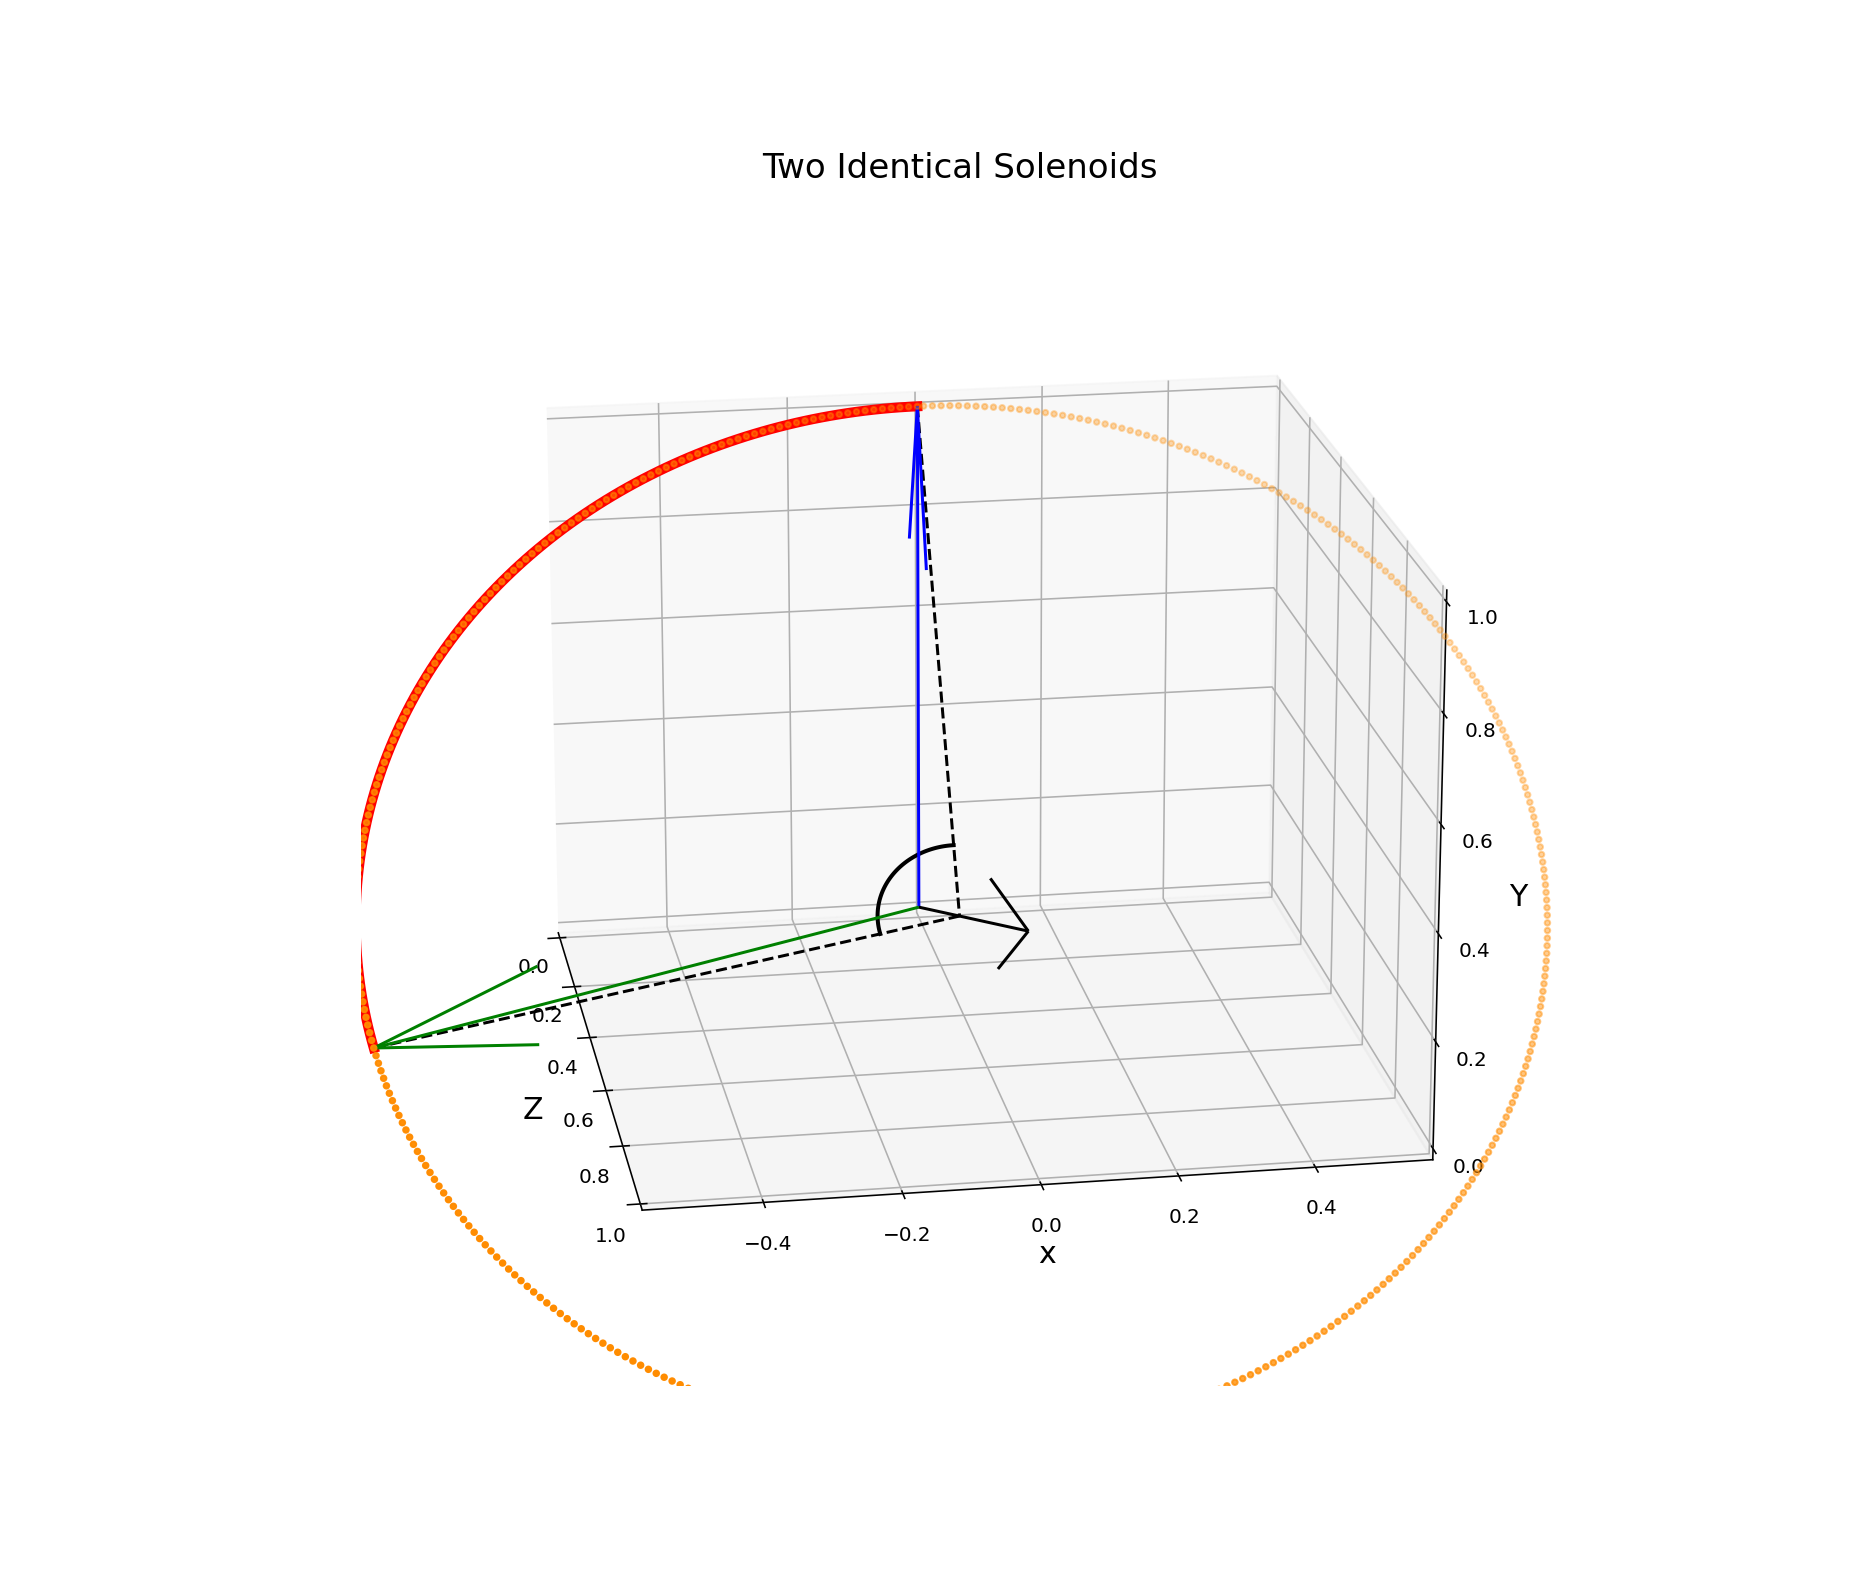

In [233]:
fig = figure(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Sz,Sx,Sy, color= 'darkorange', marker='.',s=30)
ax.plot(SLz,SLx,SLy,'r-',linewidth =5 )
ax.plot(sg[2], sg[0], sg[1],'k-',linewidth =2 )

ax.plot(z1,x1,y1,ls = '--', color = 'k')
ax.plot(z2,x2,y2,ls = '--',color = 'k')

ax.quiver(0, 0, 0, 0, 0, 1, color ='blue',alpha = 1)
ax.quiver(0, 0, 0, SLz[-1],SLx[-1],SLy[-1],color ='green',alpha = 1)

#ax.quiver(0, 0, 0, Sp[2],Sp[0],Sp[1],color ='blue',alpha = 0.5)
ax.quiver(0, 0, 0,Ws/W, 0 ,Wb/W,color ='k',alpha = 1)

    
ax.set_xlim([0, 1])
ax.set_ylim([-0.55,0.55])
ax.set_zlim([0, 1])
    
ax.set_title(r'Two Identical Solenoids', size =17) 
ax.set_xlabel(r'Z ',fontsize=15)
ax.set_ylabel(r'x ',fontsize=15)
ax.set_zlabel(r'Y',fontsize=15)
show()